In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('/content/50_Startups.csv')
df.head()


Saving 50_Startups.csv to 50_Startups (1).csv


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
print(df.info())
print(df.isnull().sum())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   

In [8]:
df = df.dropna()


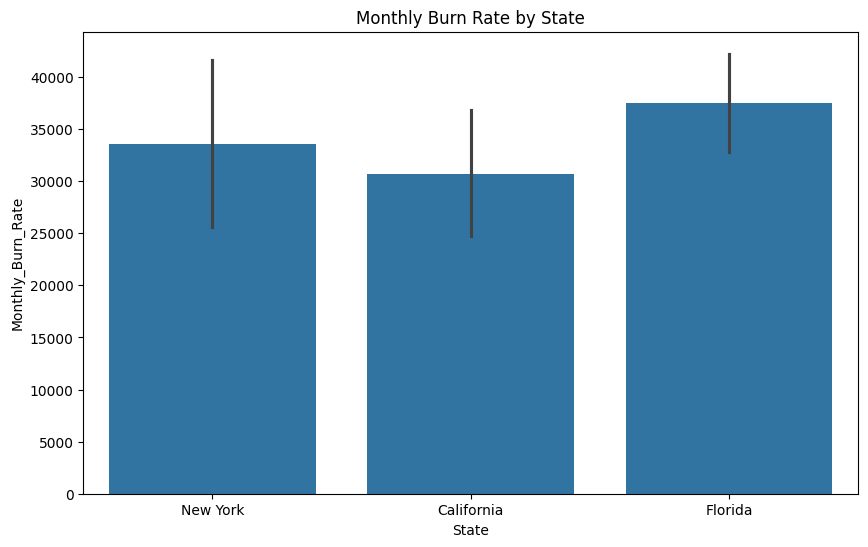

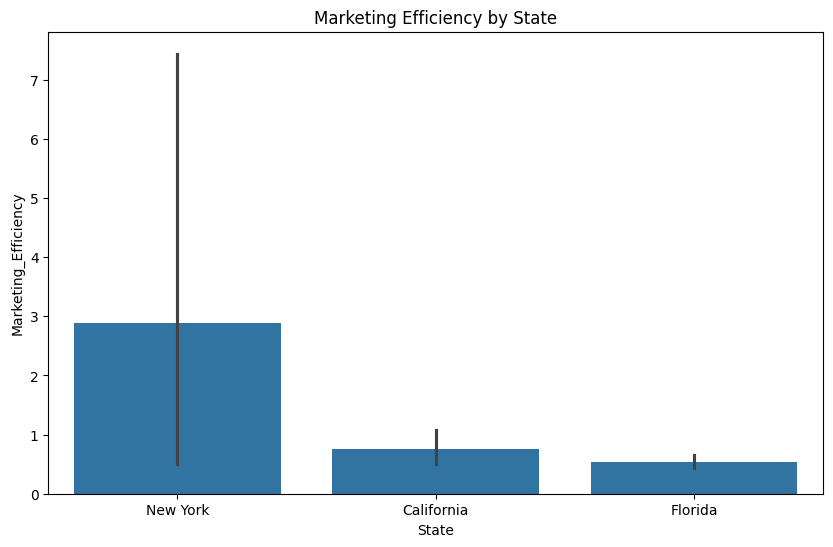

   R&D Spend  Administration  Marketing Spend  Total_Expenses  \
0  165349.20       136897.80        471784.10       774031.10   
1  162597.70       151377.59        443898.53       757873.82   
2  153441.51       101145.55        407934.54       662521.60   
3  144372.41       118671.85        383199.62       646243.88   
4  142107.34        91391.77        366168.42       599667.53   

   Estimated_Revenue     Profit  Monthly_Burn_Rate  Estimated_Runway_months  \
0          966292.93  192261.83       64502.591667                 1.736560   
1          949665.88  191792.06       63156.151667                 1.773582   
2          853571.99  191050.39       55210.133333                 2.028842   
3          829145.87  182901.99       53853.656667                 2.079945   
4          765855.47  166187.94       49972.294167                 2.241495   

   Marketing_Efficiency  Estimated_LTV  
0              0.407521      192261.83  
1              0.432063      191792.06  
2          

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset (use your filename)
df = pd.read_csv('50_Startups.csv')

# 2. Estimate Total Expenses and Revenue
df['Total_Expenses'] = df['R&D Spend'] + df['Administration'] + df['Marketing Spend']
df['Estimated_Revenue'] = df['Profit'] + df['Total_Expenses']

# 3. Burn Rate (assuming monthly = Total Expenses / 12)
df['Monthly_Burn_Rate'] = df['Total_Expenses'] / 12

# 4. Runway (assuming available cash = average Profit, as cash not given)
avg_profit = df['Profit'].mean()
df['Estimated_Runway_months'] = avg_profit / df['Monthly_Burn_Rate']

# 5. CAC (cannot compute without customer data), but we can calculate "Marketing Efficiency"
df['Marketing_Efficiency'] = df['Profit'] / df['Marketing Spend']
# Higher value = more profit per marketing unit spent

# 6. Simple LTV metric estimate
df['Estimated_LTV'] = df['Profit']

# 7. Visualize Burn Rate
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Monthly_Burn_Rate', data=df)
plt.title('Monthly Burn Rate by State')
plt.show()

# 8. Visualize Marketing Efficiency
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Marketing_Efficiency', data=df)
plt.title('Marketing Efficiency by State')
plt.show()

# 9. Show summary
print(df[['R&D Spend', 'Administration', 'Marketing Spend', 'Total_Expenses', 'Estimated_Revenue',
          'Profit', 'Monthly_Burn_Rate', 'Estimated_Runway_months', 'Marketing_Efficiency', 'Estimated_LTV']].head())

# 10. Save results
df.to_csv('startup_kpi_results.csv', index=False)


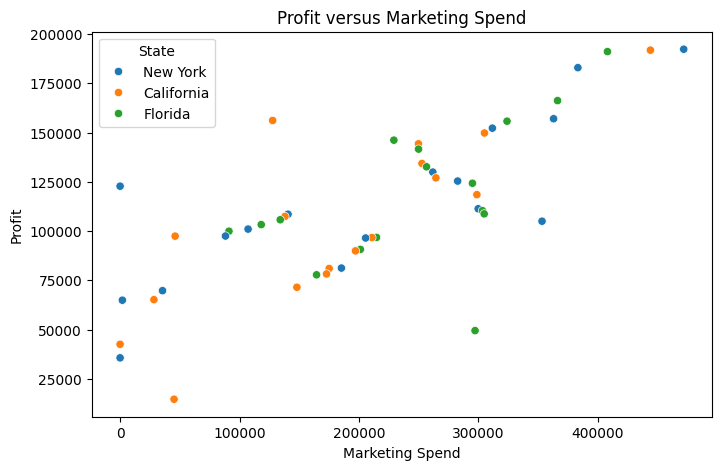

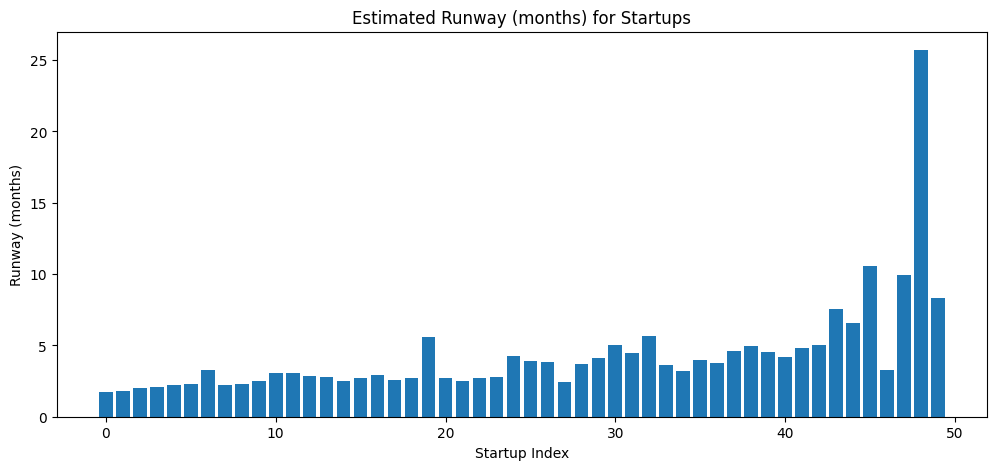

In [10]:
# Profit vs. Marketing Spend
plt.figure(figsize=(8,5))
sns.scatterplot(x='Marketing Spend', y='Profit', hue='State', data=df)
plt.title('Profit versus Marketing Spend')
plt.show()

# Estimated Runway for each startup
plt.figure(figsize=(12,5))
plt.bar(range(len(df)), df['Estimated_Runway_months'])
plt.title('Estimated Runway (months) for Startups')
plt.xlabel('Startup Index')
plt.ylabel('Runway (months)')
plt.show()


In [11]:
df.to_csv('startup_kpi_results.csv', index=False)
from google.colab import files
files.download('startup_kpi_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

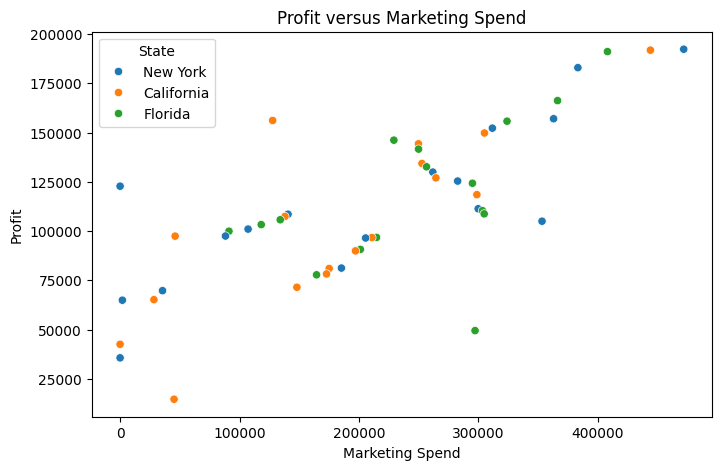

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Marketing Spend', y='Profit', hue='State', data=df)
plt.title('Profit versus Marketing Spend')
plt.savefig('profit_vs_marketing.png')
files.download('profit_vs_marketing.png')


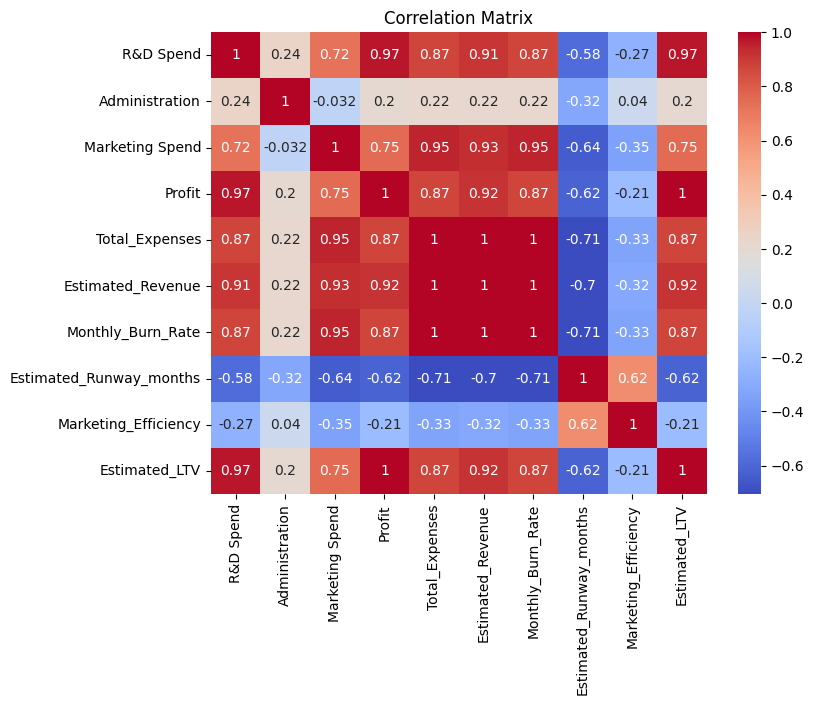

In [15]:
#  only numeric columns for correlation
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [16]:
state_summary = df.groupby('State').mean(numeric_only=True)
print(state_summary)


               R&D Spend  Administration  Marketing Spend         Profit  \
State                                                                      
California  64657.674118   120746.507059    182540.929412  103905.175294   
Florida     80724.016250   121768.897500    247323.551250  118774.024375   
New York    76195.062353   121543.470588    205346.015882  113756.446471   

            Total_Expenses  Estimated_Revenue  Monthly_Burn_Rate  \
State                                                              
California   367945.110588      471850.285882       30662.092549   
Florida      449816.465000      568590.489375       37484.705417   
New York     403084.548824      516840.995294       33590.379069   

            Estimated_Runway_months  Marketing_Efficiency  Estimated_LTV  
State                                                                     
California                 4.408980                   inf  103905.175294  
Florida                    3.190374              0.53